In [8]:
import os
import numpy as np
import pickle
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [9]:
with open('/content/drive/MyDrive/FYP/features_resnet50.pickle', 'rb') as file:
  poster_features = pickle.load(file)

In [10]:
# Load the VGG16 model (pre-trained on ImageNet) without fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model using VGG16 until a specific layer to extract features
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv2').output)

In [11]:
# Function to preprocess images and extract features using the CNN model
def extract_cnn_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = feature_extractor.predict(img_array)
    features = features.flatten()  # Flatten to create a feature vector
    return features

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_movies(target_poster, poster_features):
    # Retrieve the features of the target poster
    target_features = poster_features.get(target_poster)
    if target_features is None:
        target_features = extract_cnn_features(target_poster)
        print("Features extract from user uploaded poster")

    # Calculate similarity scores between the target poster and other posters
    similarity_scores = {}
    for poster, features in poster_features.items():
        if poster != target_poster:
            similarity = cosine_similarity([target_features], [features])[0][0]
            similarity_scores[poster] = similarity

    # Sort movies by similarity scores in descending order
    recommended_movies = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

    return recommended_movies


In [13]:
# Replace 'target_poster.jpg' with the filename of the movie poster you want recommendations for
target_movie_poster = 'don.jpg'

# Get recommendations based on visual similarity to the target movie poster
recommendations = recommend_similar_movies(target_movie_poster, poster_features)

# Print top recommended movies
top_recommendations = recommendations[:10]  # Adjust the number of recommendations you want to display
for movie, similarity_score in top_recommendations:
    print(f"Movie: {movie}, Similarity Score: {similarity_score}")


1/1 [==============================] - 1s 801ms/step
Features extract from user uploaded poster
Movie: 1523.jpg, Similarity Score: 0.12179315090179443
Movie: 2654.jpg, Similarity Score: 0.1191733181476593
Movie: 176.jpg, Similarity Score: 0.11609488725662231
Movie: 610.jpg, Similarity Score: 0.11489325016736984
Movie: 2519.jpg, Similarity Score: 0.11317715793848038
Movie: 846.jpg, Similarity Score: 0.11261928081512451
Movie: 751.jpg, Similarity Score: 0.11241947114467621
Movie: 2169.jpg, Similarity Score: 0.11205096542835236
Movie: 1825.jpg, Similarity Score: 0.11149465292692184
Movie: 2381.jpg, Similarity Score: 0.11146126687526703


1/1 [==============================] - 1s 1s/step
Features extract from user uploaded poster
Movie: 1984.jpg, Similarity Score: 0.11769475042819977
Movie: 2129.jpg, Similarity Score: 0.1171538308262825
Movie: 3926.jpg, Similarity Score: 0.11702805012464523
Movie: 1556.jpg, Similarity Score: 0.11701273173093796
Movie: 533.jpg, Similarity Score: 0.11695315688848495
Movie: 2654.jpg, Similarity Score: 0.1169508621096611
Movie: 1731.jpg, Similarity Score: 0.11657117307186127
Movie: 2665.jpg, Similarity Score: 0.11628714203834534
Movie: 1498.jpg, Similarity Score: 0.1162867322564125
Movie: 1871.jpg, Similarity Score: 0.11621178686618805


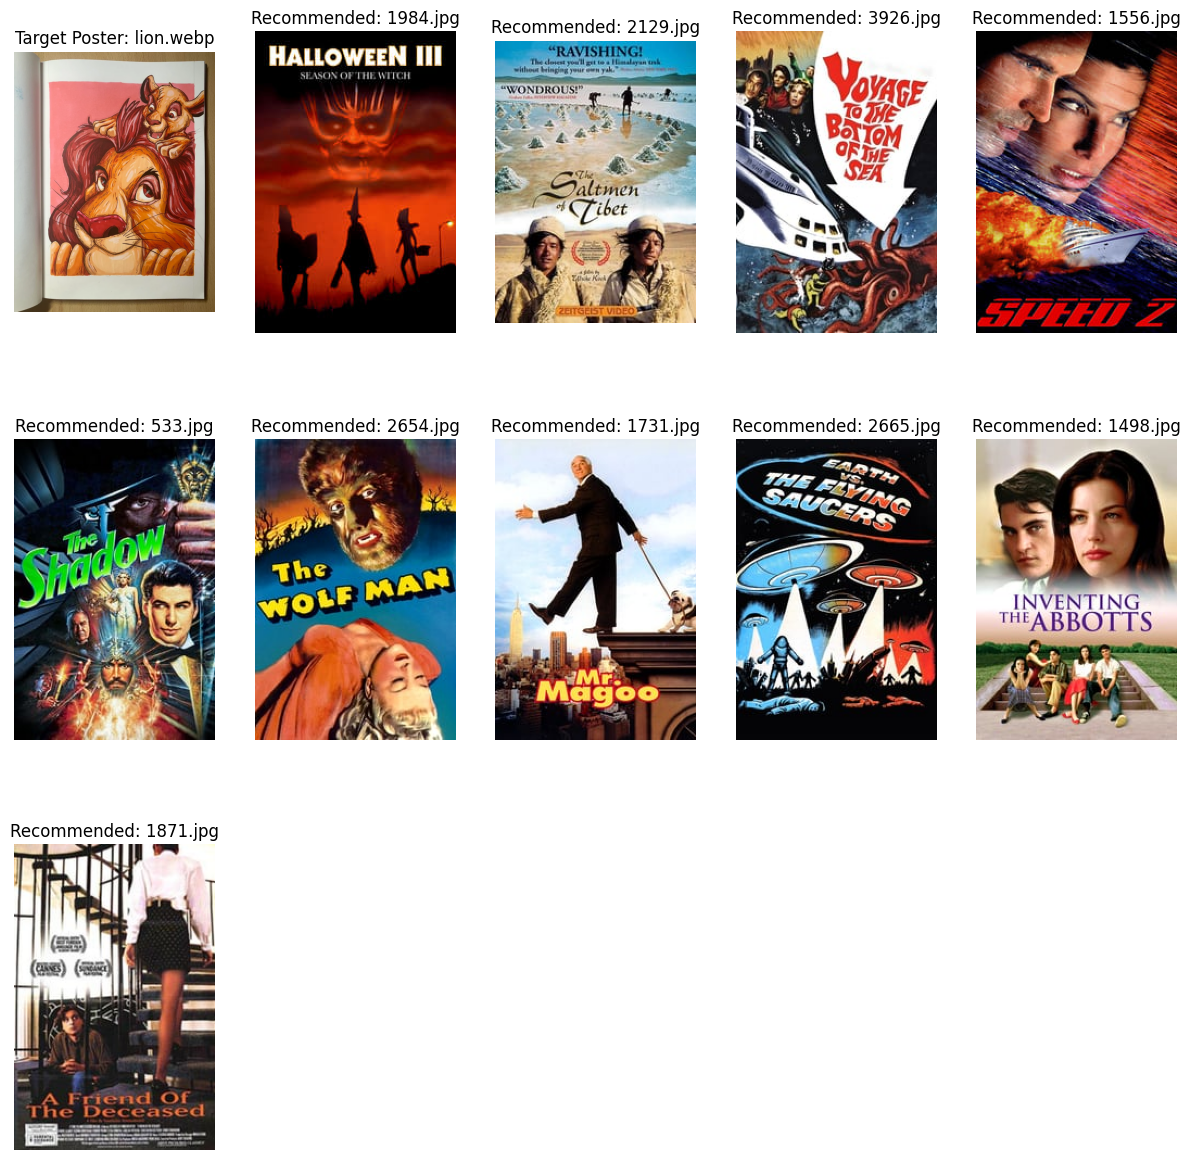

In [19]:
import os
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(rows, cols, i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Replace 'target_poster.jpg' with the filename of the movie poster you want recommendations for
target_movie_poster = 'lion.webp'

# Get recommendations based on visual similarity to the target movie poster
recommendations = recommend_similar_movies(target_movie_poster, poster_features)

# Print top recommended movies
top_recommendations = recommendations[:10]  # Adjust the number of recommendations you want to display
for movie, similarity_score in top_recommendations:
    print(f"Movie: {movie}, Similarity Score: {similarity_score}")

# Display the target poster and top recommended posters
poster_folder = '/content/drive/MyDrive/MLP-1M'  # Path to the folder containing posters
images = []
titles = []
images.append(plt.imread(target_movie_poster))
titles.append(f"Target Poster: {target_movie_poster}")

for recommended_movie, _ in top_recommendations:
    recommended_image = plt.imread(os.path.join(poster_folder, recommended_movie))
    images.append(recommended_image)
    titles.append(f"Recommended: {recommended_movie}")

# Display the images
display_images(images, titles)
